In [2]:
import pandas as pd
import numpy as np
import math
import datetime as dt

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [5]:
data=pd.read_csv('BTC-USD.csv')
data = data.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})

In [ ]:
data.head(20)

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import catboost as cb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import lightgbm as lgb

data['date'] = pd.to_datetime(data['date'])

# dibagi dua
X = data[['date', 'open', 'high', 'low', 'adj_close', 'volume']]
y = data['close']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#LGBM
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train.drop('date', axis=1), y_train)
lgb_predictions = lgb_model.predict(X_test.drop('date', axis=1))

# itung RMSE, MSE, MAE, R2 untuk model LGBM
lgb_rmse = mean_squared_error(y_test, lgb_predictions, squared=False)
lgb_mse = mean_squared_error(y_test, lgb_predictions)
lgb_mae = mean_absolute_error(y_test, lgb_predictions)
lgb_r2 = r2_score(y_test, lgb_predictions)

# XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train.drop('date', axis=1), y_train)
xgb_predictions = xgb_model.predict(X_test.drop('date', axis=1))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# CatBoost
cat_model = cb.CatBoostRegressor()
cat_model.fit(X_train.drop('date', axis=1), y_train)
cat_predictions = cat_model.predict(X_test.drop('date', axis=1))
cat_rmse = np.sqrt(mean_squared_error(y_test, cat_predictions))
cat_mse = mean_squared_error(y_test, cat_predictions)
cat_mae = mean_absolute_error(y_test, cat_predictions)
cat_r2 = r2_score(y_test, cat_predictions)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train.drop('date', axis=1), y_train)
rf_predictions = rf_model.predict(X_test.drop('date', axis=1))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# AdaBoost
adaboost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100)
adaboost_model.fit(X_train.drop('date', axis=1), y_train)
adaboost_predictions = adaboost_model.predict(X_test.drop('date', axis=1))
adaboost_rmse = np.sqrt(mean_squared_error(y_test, adaboost_predictions))
adaboost_mse = mean_squared_error(y_test, adaboost_predictions)
adaboost_mae = mean_absolute_error(y_test, adaboost_predictions)
adaboost_r2 = r2_score(y_test, adaboost_predictions)

# Print 
print("LightGBM:")
print("RMSE:", lgb_rmse)
print("MSE:", lgb_mse)
print("MAE:", lgb_mae)
print("R2 Score:", lgb_r2)
print()

print("XGBoost:")
print("RMSE:", xgb_rmse)
print("MSE:", xgb_mse)
print("MAE:", xgb_mae)
print("R2 Score:", xgb_r2)
print()

print("CatBoost:")
print("RMSE:", cat_rmse)
print("MSE:", cat_mse)
print("MAE:", cat_mae)
print("R2 Score:", cat_r2)
print()

print("Random Forest:")
print("RMSE:", rf_rmse)
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R2 Score:", rf_r2)
print()

print("AdaBoost:")
print("RMSE:", adaboost_rmse)
print("MSE:", adaboost_mse)
print("MAE:", adaboost_mae)
print("R2 Score:", adaboost_r2)
print()

Learning rate set to 0.047499
0:	learn: 15377.7322020	total: 1.38ms	remaining: 1.38s
1:	learn: 14684.2855803	total: 2.69ms	remaining: 1.34s
2:	learn: 14024.6146524	total: 3.84ms	remaining: 1.27s
3:	learn: 13391.9785673	total: 4.97ms	remaining: 1.24s
4:	learn: 12801.4343930	total: 6.1ms	remaining: 1.21s
5:	learn: 12236.6296551	total: 7.28ms	remaining: 1.21s
6:	learn: 11690.1854807	total: 8.42ms	remaining: 1.19s
7:	learn: 11177.0233837	total: 9.56ms	remaining: 1.19s
8:	learn: 10676.2697536	total: 10.7ms	remaining: 1.18s
9:	learn: 10192.5402025	total: 11.9ms	remaining: 1.18s
10:	learn: 9740.9094023	total: 13ms	remaining: 1.17s
11:	learn: 9316.1511965	total: 14.1ms	remaining: 1.16s
12:	learn: 8903.1722035	total: 15.2ms	remaining: 1.15s
13:	learn: 8511.9994619	total: 16.3ms	remaining: 1.15s
14:	learn: 8135.8831906	total: 17.5ms	remaining: 1.15s
15:	learn: 7772.1964654	total: 18.6ms	remaining: 1.15s
16:	learn: 7429.8361649	total: 19.8ms	remaining: 1.14s
17:	learn: 7108.2578465	total: 20.9ms	

274:	learn: 322.0085289	total: 337ms	remaining: 890ms
275:	learn: 321.9052465	total: 339ms	remaining: 888ms
276:	learn: 321.2193226	total: 340ms	remaining: 887ms
277:	learn: 319.9371523	total: 341ms	remaining: 887ms
278:	learn: 319.5479786	total: 343ms	remaining: 886ms
279:	learn: 318.3495509	total: 344ms	remaining: 885ms
280:	learn: 317.8739294	total: 345ms	remaining: 883ms
281:	learn: 317.5136776	total: 346ms	remaining: 882ms
282:	learn: 316.9793393	total: 348ms	remaining: 880ms
283:	learn: 316.6717427	total: 349ms	remaining: 879ms
284:	learn: 316.0374892	total: 350ms	remaining: 878ms
285:	learn: 315.2177320	total: 351ms	remaining: 877ms
286:	learn: 314.0477126	total: 353ms	remaining: 877ms
287:	learn: 313.2901066	total: 355ms	remaining: 878ms
288:	learn: 313.1387275	total: 357ms	remaining: 879ms
289:	learn: 312.6869787	total: 358ms	remaining: 877ms
290:	learn: 312.2255249	total: 359ms	remaining: 876ms
291:	learn: 311.6458669	total: 360ms	remaining: 874ms
292:	learn: 310.6246223	tota

524:	learn: 228.9732231	total: 666ms	remaining: 603ms
525:	learn: 228.7659035	total: 667ms	remaining: 601ms
526:	learn: 228.5611413	total: 668ms	remaining: 600ms
527:	learn: 228.2695174	total: 671ms	remaining: 599ms
528:	learn: 228.1594048	total: 672ms	remaining: 598ms
529:	learn: 227.8808655	total: 673ms	remaining: 597ms
530:	learn: 227.4856125	total: 674ms	remaining: 595ms
531:	learn: 227.4000154	total: 675ms	remaining: 594ms
532:	learn: 227.2708518	total: 676ms	remaining: 593ms
533:	learn: 226.9360666	total: 677ms	remaining: 591ms
534:	learn: 226.5561438	total: 679ms	remaining: 590ms
535:	learn: 226.4363875	total: 680ms	remaining: 588ms
536:	learn: 226.2008963	total: 681ms	remaining: 587ms
537:	learn: 225.8910786	total: 683ms	remaining: 586ms
538:	learn: 225.6895922	total: 684ms	remaining: 585ms
539:	learn: 225.4364616	total: 687ms	remaining: 585ms
540:	learn: 225.3519205	total: 688ms	remaining: 584ms
541:	learn: 225.0088927	total: 689ms	remaining: 582ms
542:	learn: 224.8008579	tota

814:	learn: 178.1099598	total: 1.01s	remaining: 230ms
815:	learn: 178.0368235	total: 1.01s	remaining: 228ms
816:	learn: 177.7684476	total: 1.01s	remaining: 227ms
817:	learn: 177.7211985	total: 1.01s	remaining: 226ms
818:	learn: 177.6764814	total: 1.02s	remaining: 225ms
819:	learn: 177.6420475	total: 1.02s	remaining: 223ms
820:	learn: 177.5539048	total: 1.02s	remaining: 222ms
821:	learn: 177.4951561	total: 1.02s	remaining: 221ms
822:	learn: 177.4655275	total: 1.02s	remaining: 220ms
823:	learn: 177.4093665	total: 1.02s	remaining: 218ms
824:	learn: 177.3606382	total: 1.02s	remaining: 217ms
825:	learn: 177.1955124	total: 1.02s	remaining: 216ms
826:	learn: 177.0537171	total: 1.03s	remaining: 215ms
827:	learn: 177.0268574	total: 1.03s	remaining: 214ms
828:	learn: 176.8460119	total: 1.03s	remaining: 212ms
829:	learn: 176.8174982	total: 1.03s	remaining: 211ms
830:	learn: 176.6753589	total: 1.03s	remaining: 210ms
831:	learn: 176.6043183	total: 1.03s	remaining: 208ms
832:	learn: 176.4689002	tota

LightGBM:
RMSE: 155.71032883695327
MSE: 24245.70650651212
MAE: 69.89859859992104
R2 Score: 0.9999014228836239

XGBoost:
RMSE: 120.57831254765702
MSE: 14539.129456840461
MAE: 52.99349814182735
R2 Score: 0.9999408874533687

CatBoost:
RMSE: 286.43794033756893
MSE: 82046.6936648287
MAE: 148.20550381256334
R2 Score: 0.9996664181978985

Random Forest:
RMSE: 55.49795486863472
MSE: 3080.0229946010163
MAE: 20.632600523547733
R2 Score: 0.9999874773793415

AdaBoost:
RMSE: 452.6820391474351
MSE: 204921.02856667998
MAE: 326.4949983348598
R2 Score: 0.9991668411858616



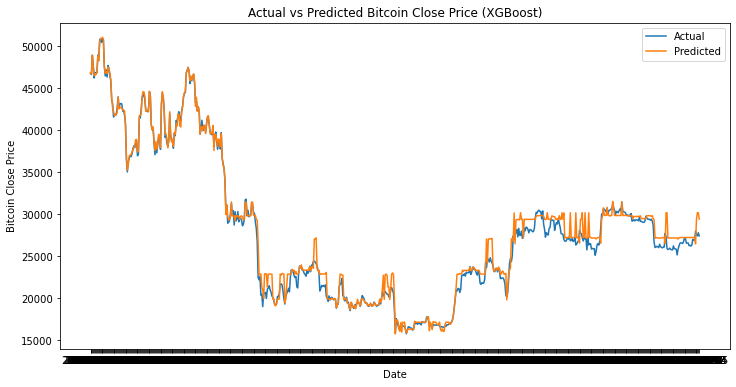

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

# Filter data
start_date = '2014-01-01'
end_date = '2023-12-31'
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Prepare variabel
X = filtered_data[['date', 'open', 'high', 'low', 'volume']]
y = filtered_data['close']

# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# train model XGB
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train.drop('date', axis=1), y_train)
xgb_predictions = xgb_model.predict(X_test.drop('date', axis=1))

# Buat Plot
plt.figure(figsize=(12, 6))
plt.plot(X_test['date'], y_test, label='Actual')
plt.plot(X_test['date'], xgb_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Bitcoin Close Price')
plt.title('Actual vs Predicted Bitcoin Close Price (XGBoost)')
plt.legend()
plt.show()

3305    27415.912109
Name: close, dtype: float64

Learning rate set to 0.047499
0:	learn: 15205.7023352	total: 161ms	remaining: 2m 40s
1:	learn: 14522.7829226	total: 166ms	remaining: 1m 22s
2:	learn: 13867.5932571	total: 170ms	remaining: 56.4s
3:	learn: 13247.9295209	total: 175ms	remaining: 43.5s
4:	learn: 12646.5642448	total: 180ms	remaining: 35.8s
5:	learn: 12084.1071387	total: 184ms	remaining: 30.4s
6:	learn: 11547.9579763	total: 188ms	remaining: 26.7s
7:	learn: 11028.1207814	total: 192ms	remaining: 23.8s
8:	learn: 10528.5937131	total: 198ms	remaining: 21.8s
9:	learn: 10052.0549204	total: 202ms	remaining: 20s
10:	learn: 9601.0283277	total: 207ms	remaining: 18.7s
11:	learn: 9170.3084762	total: 212ms	remaining: 17.4s
12:	learn: 8761.3062013	total: 216ms	remaining: 16.4s
13:	learn: 8369.6522939	total: 221ms	remaining: 15.6s
14:	learn: 7996.8128819	total: 226ms	remaining: 14.8s
15:	learn: 7641.1605958	total: 233ms	remaining: 14.3s
16:	learn: 7298.7481619	total: 238ms	remaining: 13.8s
17:	learn: 6977.7555656	total: 242ms	remaining: 13.2

168:	learn: 382.5173426	total: 859ms	remaining: 4.22s
169:	learn: 381.6137640	total: 862ms	remaining: 4.21s
170:	learn: 380.1895605	total: 866ms	remaining: 4.2s
171:	learn: 378.6496289	total: 869ms	remaining: 4.18s
172:	learn: 377.0162760	total: 874ms	remaining: 4.18s
173:	learn: 376.4669606	total: 877ms	remaining: 4.16s
174:	learn: 375.6013609	total: 881ms	remaining: 4.15s
175:	learn: 375.0920449	total: 885ms	remaining: 4.14s
176:	learn: 374.4467341	total: 889ms	remaining: 4.13s
177:	learn: 373.0256880	total: 893ms	remaining: 4.12s
178:	learn: 372.1997345	total: 896ms	remaining: 4.11s
179:	learn: 371.0350403	total: 900ms	remaining: 4.1s
180:	learn: 370.4100615	total: 904ms	remaining: 4.09s
181:	learn: 369.3467794	total: 908ms	remaining: 4.08s
182:	learn: 368.8016481	total: 911ms	remaining: 4.07s
183:	learn: 368.1466964	total: 915ms	remaining: 4.06s
184:	learn: 366.6245793	total: 919ms	remaining: 4.05s
185:	learn: 366.4805938	total: 922ms	remaining: 4.04s
186:	learn: 366.2927594	total:

338:	learn: 279.0114690	total: 1.51s	remaining: 2.95s
339:	learn: 278.5411164	total: 1.52s	remaining: 2.95s
340:	learn: 278.1148147	total: 1.52s	remaining: 2.94s
341:	learn: 277.8749427	total: 1.52s	remaining: 2.94s
342:	learn: 277.3555545	total: 1.53s	remaining: 2.93s
343:	learn: 276.9401261	total: 1.53s	remaining: 2.92s
344:	learn: 276.6294040	total: 1.54s	remaining: 2.92s
345:	learn: 276.4303073	total: 1.54s	remaining: 2.91s
346:	learn: 276.1097493	total: 1.54s	remaining: 2.91s
347:	learn: 275.5864482	total: 1.55s	remaining: 2.9s
348:	learn: 275.3243057	total: 1.55s	remaining: 2.9s
349:	learn: 275.0909612	total: 1.56s	remaining: 2.89s
350:	learn: 274.5359798	total: 1.56s	remaining: 2.88s
351:	learn: 274.1512435	total: 1.56s	remaining: 2.88s
352:	learn: 273.8267816	total: 1.57s	remaining: 2.87s
353:	learn: 273.6980870	total: 1.57s	remaining: 2.87s
354:	learn: 273.4001312	total: 1.57s	remaining: 2.86s
355:	learn: 272.9260613	total: 1.58s	remaining: 2.86s
356:	learn: 272.7693550	total:

517:	learn: 223.7530659	total: 2.21s	remaining: 2.06s
518:	learn: 223.7114404	total: 2.21s	remaining: 2.05s
519:	learn: 223.5738679	total: 2.22s	remaining: 2.05s
520:	learn: 223.3943254	total: 2.22s	remaining: 2.04s
521:	learn: 223.1709383	total: 2.23s	remaining: 2.04s
522:	learn: 223.0704860	total: 2.23s	remaining: 2.03s
523:	learn: 222.6860595	total: 2.23s	remaining: 2.03s
524:	learn: 222.4845399	total: 2.24s	remaining: 2.02s
525:	learn: 222.3614504	total: 2.24s	remaining: 2.02s
526:	learn: 222.0803282	total: 2.24s	remaining: 2.01s
527:	learn: 221.8552140	total: 2.25s	remaining: 2.01s
528:	learn: 221.7063178	total: 2.25s	remaining: 2s
529:	learn: 221.3256696	total: 2.25s	remaining: 2s
530:	learn: 220.9642617	total: 2.26s	remaining: 2s
531:	learn: 220.7403424	total: 2.26s	remaining: 1.99s
532:	learn: 220.6611675	total: 2.27s	remaining: 1.99s
533:	learn: 220.6219755	total: 2.27s	remaining: 1.98s
534:	learn: 220.4195515	total: 2.27s	remaining: 1.98s
535:	learn: 220.3072083	total: 2.28s	

698:	learn: 187.6237882	total: 2.9s	remaining: 1.25s
699:	learn: 187.5610276	total: 2.91s	remaining: 1.25s
700:	learn: 187.3217323	total: 2.91s	remaining: 1.24s
701:	learn: 187.1434222	total: 2.92s	remaining: 1.24s
702:	learn: 187.1131248	total: 2.92s	remaining: 1.23s
703:	learn: 187.0635621	total: 2.92s	remaining: 1.23s
704:	learn: 187.0340848	total: 2.93s	remaining: 1.22s
705:	learn: 186.9030107	total: 2.93s	remaining: 1.22s
706:	learn: 186.8241426	total: 2.93s	remaining: 1.22s
707:	learn: 186.6405909	total: 2.94s	remaining: 1.21s
708:	learn: 186.4450310	total: 2.94s	remaining: 1.21s
709:	learn: 186.2660723	total: 2.94s	remaining: 1.2s
710:	learn: 185.8626276	total: 2.95s	remaining: 1.2s
711:	learn: 185.7398594	total: 2.95s	remaining: 1.19s
712:	learn: 185.5991786	total: 2.96s	remaining: 1.19s
713:	learn: 185.4242161	total: 2.96s	remaining: 1.19s
714:	learn: 185.3560953	total: 2.96s	remaining: 1.18s
715:	learn: 185.2382772	total: 2.97s	remaining: 1.18s
716:	learn: 185.1699385	total: 

878:	learn: 162.0461089	total: 3.6s	remaining: 495ms
879:	learn: 161.9482550	total: 3.6s	remaining: 491ms
880:	learn: 161.9041682	total: 3.6s	remaining: 487ms
881:	learn: 161.7845272	total: 3.61s	remaining: 483ms
882:	learn: 161.5246914	total: 3.61s	remaining: 479ms
883:	learn: 161.3918746	total: 3.62s	remaining: 475ms
884:	learn: 161.2840561	total: 3.62s	remaining: 470ms
885:	learn: 161.1258190	total: 3.62s	remaining: 466ms
886:	learn: 160.9790116	total: 3.63s	remaining: 462ms
887:	learn: 160.9454333	total: 3.63s	remaining: 458ms
888:	learn: 160.8777377	total: 3.63s	remaining: 454ms
889:	learn: 160.7986632	total: 3.64s	remaining: 450ms
890:	learn: 160.6951417	total: 3.64s	remaining: 446ms
891:	learn: 160.6294676	total: 3.65s	remaining: 441ms
892:	learn: 160.5628264	total: 3.65s	remaining: 437ms
893:	learn: 160.5426722	total: 3.65s	remaining: 433ms
894:	learn: 160.5230323	total: 3.65s	remaining: 429ms
895:	learn: 160.0353777	total: 3.66s	remaining: 425ms
896:	learn: 159.9495286	total: 

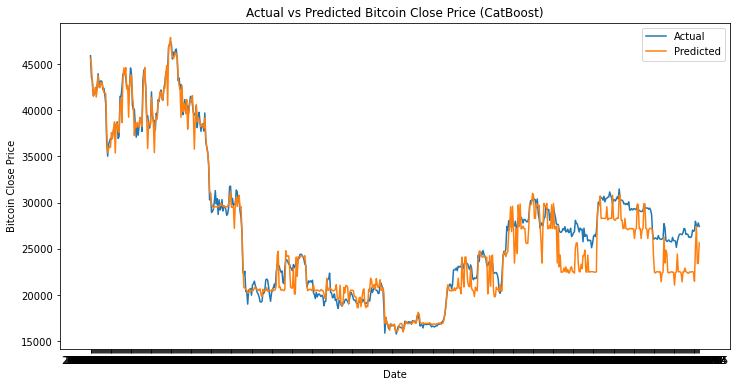

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor


# Filter data
start_date = '2015-01-01'
end_date = '2023-12-31'
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Prepare variabel
X = filtered_data[['date', 'open', 'high', 'low', 'volume']]
y = filtered_data['close']

# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# train model Catboost
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train.drop('date', axis=1), y_train)
catboost_predictions = catboost_model.predict(X_test.drop('date', axis=1))

# buat plot
plt.figure(figsize=(12, 6))
plt.plot(X_test['date'], y_test, label='Actual')
plt.plot(X_test['date'], catboost_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Bitcoin Close Price')
plt.title('Actual vs Predicted Bitcoin Close Price (CatBoost)')
plt.legend()
plt.show()

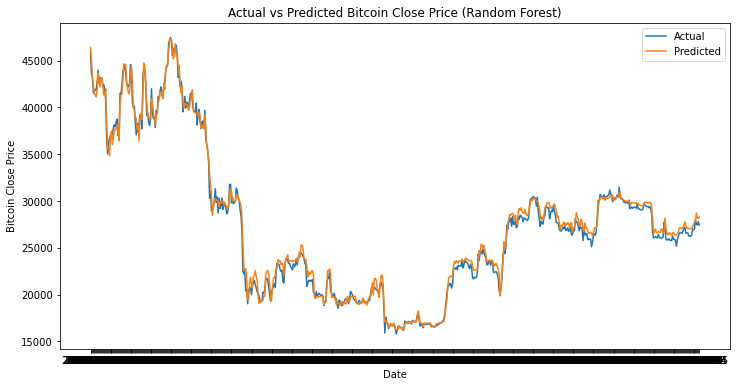

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Filter data
start_date = '2015-01-01'
end_date = '2023-12-31'
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Prepare variabel
X = filtered_data[['date', 'open', 'high', 'low', 'volume']]
y = filtered_data['close']

# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# train model RandomForest
randomforest_model = RandomForestRegressor()
randomforest_model.fit(X_train.drop('date', axis=1), y_train)
randomforest_predictions = randomforest_model.predict(X_test.drop('date', axis=1))

# plot
plt.figure(figsize=(12, 6))
plt.plot(X_test['date'], y_test, label='Actual')
plt.plot(X_test['date'], randomforest_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Bitcoin Close Price')
plt.title('Actual vs Predicted Bitcoin Close Price (Random Forest)')
plt.legend()
plt.show()

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 2560, number of used features: 4
[LightGBM] [Info] Start training from score 11233.372932


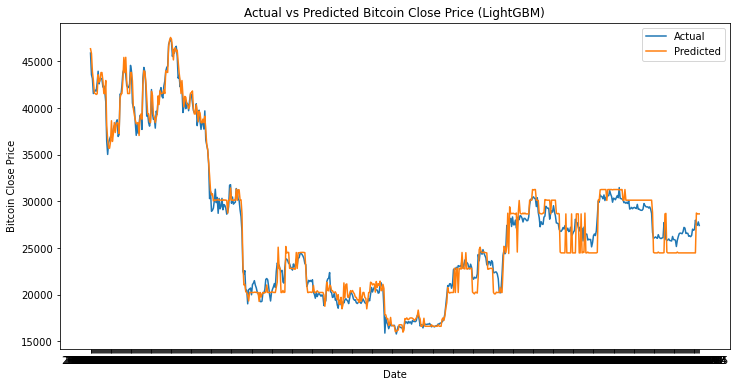

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb


# Filter data
start_date = '2015-01-01'
end_date = '2023-12-31'
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Prepare variabel
X = filtered_data[['date', 'open', 'high', 'low', 'volume']]
y = filtered_data['close']

# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


train_data = lgb.Dataset(X_train.drop('date', axis=1), label=y_train)
params = {
    'objective': 'regression',
    'metric': 'rmse'
}

# Train model LightGBM
lightgbm_model = lgb.train(params, train_data)
lightgbm_predictions = lightgbm_model.predict(X_test.drop('date', axis=1))

# buat plot
plt.figure(figsize=(12, 6))
plt.plot(X_test['date'], y_test, label='Actual')
plt.plot(X_test['date'], lightgbm_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Bitcoin Close Price')
plt.title('Actual vs Predicted Bitcoin Close Price (LightGBM)')
plt.legend()
plt.show()

Epoch 1/50
80/80 [==============================] - 5s 9ms/step - loss: 0.0045
Epoch 2/50
80/80 [==============================] - 1s 8ms/step - loss: 6.1388e-04
Epoch 3/50
80/80 [==============================] - 1s 8ms/step - loss: 6.0220e-04
Epoch 4/50
80/80 [==============================] - 1s 9ms/step - loss: 6.4062e-04
Epoch 5/50
80/80 [==============================] - 1s 8ms/step - loss: 6.4809e-04
Epoch 6/50
80/80 [==============================] - 1s 8ms/step - loss: 5.4287e-04
Epoch 7/50
80/80 [==============================] - 1s 9ms/step - loss: 4.7646e-04
Epoch 8/50
80/80 [==============================] - 1s 8ms/step - loss: 4.6738e-04
Epoch 9/50
80/80 [==============================] - 1s 8ms/step - loss: 4.6471e-04
Epoch 10/50
80/80 [==============================] - 1s 8ms/step - loss: 4.4679e-04
Epoch 11/50
80/80 [==============================] - 1s 8ms/step - loss: 4.8821e-04
Epoch 12/50
80/80 [==============================] - 1s 8ms/step - loss: 4.8300e-04
Epoch

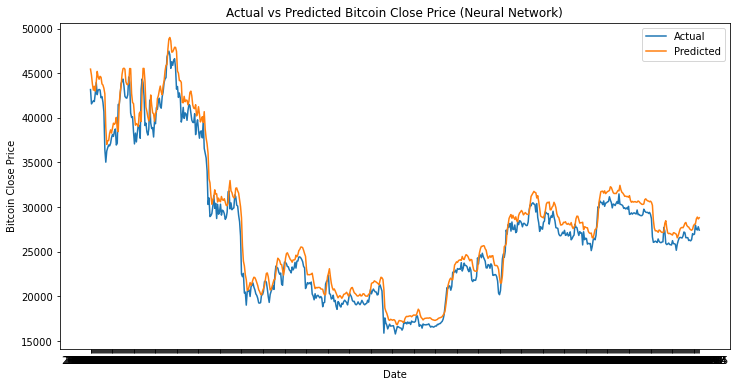

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

data = filtered_data[['date', 'open', 'high', 'low', 'volume', 'close']]


scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop('date', axis=1))


window_size = 10  


def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size, -1])  
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, window_size)


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, data.shape[1] - 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=32)


lstm_predictions = model.predict(X_test)


lstm_predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], lstm_predictions.reshape(-1, 1)), axis=1))[:, -1]
y_test = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]


plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date'].values[train_size + window_size:], y_test, label='Actual')
plt.plot(filtered_data['date'].values[train_size + window_size:], lstm_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Bitcoin Close Price')
plt.title('Actual vs Predicted Bitcoin Close Price (Neural Network)')
plt.legend()
plt.show()


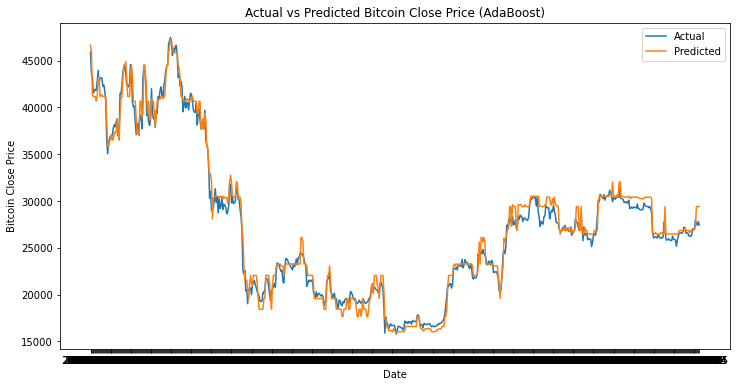

In [9]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



data = filtered_data[['date', 'open', 'high', 'low', 'volume', 'close']]


X = data.drop(['date', 'close'], axis=1)  
y = data['close']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


adaboost_model = AdaBoostRegressor()

adaboost_model.fit(X_train, y_train)

adaboost_predictions = adaboost_model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date'].values[-len(y_test):], y_test, label='Actual')
plt.plot(filtered_data['date'].values[-len(y_test):], adaboost_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Bitcoin Close Price')
plt.title('Actual vs Predicted Bitcoin Close Price (AdaBoost)')
plt.legend()
plt.show()
